In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization

### Due Date: Thursday, October 3, 11:59 PM
You must submit this assignment to Gradescope by the on-time deadline, Thursday, October 3, at 11:59 PM. Please read the syllabus for the Slip Day policy. No late submissions beyond what is outlined in the Slip Day policy will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

Please read the instructions carefully when submitting your work to Gradescope. 

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you discuss the assignments with others, please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

Bike-sharing systems are a new generation of traditional bike rentals where the process of signing up, renting, and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike-sharing data from Washington, DC. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike-sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* Reading plain text delimited data into `pandas`,
* Wrangling data for analysis,
* Using EDA to learn about your data, and 
* Making informative plots.

## Grading
Grading is broken down into auto-graded answers and free responses. For auto-graded answers, the results of your code are compared to provided and/or hidden tests. For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question. Most of the plots will be manually graded. Your plots should be *similar* to the given examples. We will accept small variations, such as color differences or slight variations in scale. However, it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers. 

**Note that for ALL plotting questions from here on out, we will expect descriptive titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Manual | Points
--- |---| ---
1a |Yes |1
1b |Yes |1
2a |No |2
2b |No |1
2c |No |3
3a |Yes |2
3b |Yes |2
3c |Yes |2
3d |Yes |2
4a |Yes |3
4b |Yes |1
4c |Yes |3
5  |Yes |2
6a |Yes |3
6b |Yes |2
7a |No |1
7b |Yes |4
7c |Yes |2
8a |Yes |2
8b |Yes |2
Total |15 |41

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.  Our autograder isn't smart enough to check, but you're depriving yourself of key learning objectives if you write loops / comprehensions, and you also won't be ready for the midterm.

### Debugging Guide
If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Jupyter notebooks / Datahub, Gradescope, and common `pandas` errors.

In [2]:
# Run this cell to set up your notebook. Make sure ds100_utils.py is in this assignment's folder
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Latex, Markdown

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Loading Bike Sharing Data
The data we are exploring is collected from a bike-sharing system in Washington, DC.

The variables in this `DataFrame` are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether the day is a holiday or not
weekday | day of the week
workingday | if the day is neither a weekend nor a holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes, including casual and registered  

### Download the Data

In [3]:
# Run this cell to download the data; no further action is needed.

data_url = 'https://github.com/DS-100/fa20/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = 'data/'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Fri Oct  4 03:41:01 2024
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data/data.zip
Extracted Files:
	 data/bikeshare.txt
	 data/data.zip


### Examining the File Contents

As a quick, ungraded exercise, try and see if you can identify the file format of the file below. (No answer required).

In [4]:
# Run this cell to look at the top of the file; no further action is needed.
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? Once again, this is ungraded, and there is no answer required.

In [5]:
# Run this cell to view some metadata; no further action is needed.
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the Data

The following code loads the data into the `bike` `DataFrame`.

In [6]:
# Run this cell to load the data; no further action is needed.
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the `DataFrame` matches the number of lines in the file minus the header row.

In [7]:
bike.shape

(17379, 17)

<hr style="border: 1px solid #fdb515;" />

## 1: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 1a
What is the granularity of the data (i.e., what does each row represent)?

**Hint:** Examine all variables present in the dataset carefully before answering this question! Pay special attention to the time-based columns.

Each row in the dataset represents the aggregated information for bike-sharing activity during a specific hour, including the number of casual and registered users, weather conditions (such as temperature, humidity, and windspeed), and whether it's a holiday, weekend, or workday.

<!-- END QUESTION -->



In [8]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 1b
For this assignment, we'll be using this data to study bike usage in Washington, DC. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that one could collect to address some of these limitations?

Location Data: Without a location variable, analyzing geographic patterns, such as which stations or areas are most frequently used is impossible. A location variable could help identify high-demand zones or under-served areas within the bike-sharing network. This would be crucial for optimizing bike distribution and station placement.

Solution: Including the specific station or location where the bikes were rented from and returned to would help identify the most popular routes or areas, enabling more efficient allocation of bikes and better infrastructure planning.

Duration of Use: The dataset provides information on the total number of users (casual and registered) per hour, but it lacks details about how long each individual or group uses the bikes. Knowing the duration of bike rentals could give a better picture of usage patterns, such as whether most rides are for commuting or leisure, and the average trip length.

Solution: Adding a variable for the duration of each bike ride would allow for deeper insights into the nature of bike usage. This could reveal whether users typically ride for short commutes or longer recreational activities.

<!-- END QUESTION -->



In [9]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<hr style="border: 1px solid #fdb515;" />

## 2: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this question, we will *mutate* the `DataFrame`, **overwriting the corresponding variables in the data frame.** As opposed to creating a copy of the `DataFrame`, since we are making changes to `bike` directly, we term this to be an in-place data transformation. To keep track of these changes, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying data file `bikeshare.txt` unmodified.

<br>

--- 
### Question 2a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  *Hint:* There are fewer holidays.
1. `weekday`: Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'`) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon`, and so on, in order of the previous sentence.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on in order of the previous sentence.

**Note:** If you mutate any of the tables above, then they will not be in the format of their original `.txt` file. As a debugging tip, if you want to revert changes, rerun the cell that loads in the `bike` `DataFrame`.

**Hint:**  One approach is to use the `.replace`[(documentation)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the `pd.DataFrame` class.

In [10]:
# Modify holiday, weekday, workingday, and weathersit here.
bike["holiday"] = bike["holiday"].replace({1: "yes", 0: "no"})
bike["weekday"] = bike["weekday"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})
bike["workingday"] = bike["workingday"].replace({1: "yes", 0: "no"})
bike["weathersit"] = bike["weathersit"].replace({1: "Clear", 2: "Mist", 3: "Light", 4: "Heavy"})
                                          
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
grader.check("q2a")

q2a results: All test cases passed!

<br>

--- 
### Question 2b (Wednesdays)

How many entries in `bike` correspond to Wednesdays? Set the variable `num_wednesdays` to this value.

In [12]:
num_wednesdays = bike[bike["weekday"] == "Wed"].shape[0]
num_wednesdays

2475

In [13]:
grader.check("q2b")

q2b results: All test cases passed!

<br>

--- 
### Question 2c (Computing Daily Total Counts)
In the next few questions, we will be analyzing the daily number of registered and unregistered users.

Construct a `DataFrame` named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day.
* `registered`: total number of registered riders for each day.
* `workingday`: whether that day is a working day or not (`yes` or `no`).

**Hint:** This question is similar to Question 2b in Homework 2B.

In [14]:
daily_counts = bike.groupby("dteday").agg({"casual": sum, "registered": sum, "workingday": "first"})
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


In [15]:
grader.check("q2c")

q2c results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

## 3: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders. Questions 3-8 require using many visualization methods, so for your convenience, we have summarized a few useful ones below.

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e., arrays, lists, or `Series`).

| Function | Description |
| -------- | ----------- |
| `plt.title(name)` | Adds a title `name` to the current plot. |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis. |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis. |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y`. |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y`. |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence. |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height`. |
|`sns.histplot(data=, x=, y=, hue=, kde=)` | Creates a distribution plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the `x` and `y` axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve. |
|`sns.lineplot(data=, x=, y=, hue=)` | Creates a line plot. |
|`sns.scatterplot(data=, x=, y=, hue=, size=)` | Creates a scatter plot; `size` is a vector that contains the size of the point for each subcategory based on `hue`. |
|`sns.kdeplot(data=, x=, y=)` | Creates a kernel density estimate plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the `x` and `y` axes. |
|`sns.jointplot(data=, x=, y=, kind=)` | Creates a joint plot of 2 variables with a KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist`. |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3a

Use the `sns.histplot`[(documentation)](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 2c. In other words, you should be using `daily_counts` to answer this question.

**Hints:** 
- You will need to set the `stat` parameter appropriately to match the desired plot.
- The `label` parameter of `sns.histplot` allows you to specify, as a string, how the plot should be labeled in the legend. For example, passing in `label="My data"` would give your plot the label "My data" in the legend.
- You will need to make two calls to `sns.histplot`.
 

Include a `legend`, `xlabel`, `ylabel`, and `title`. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g., on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="700px" />

For all visualizations in Data 100, our grading team will evaluate your plot based on its similarity to the provided example. While your plot does not need to be _identical_ to the example shown, we do expect it to capture its main features, such as the **general shape of the distribution**, the **axis labels**, the **legend**, and the **title**. It is okay if your plot contains small stylistic differences, such as differences in color, line weight, font, or size/scale.

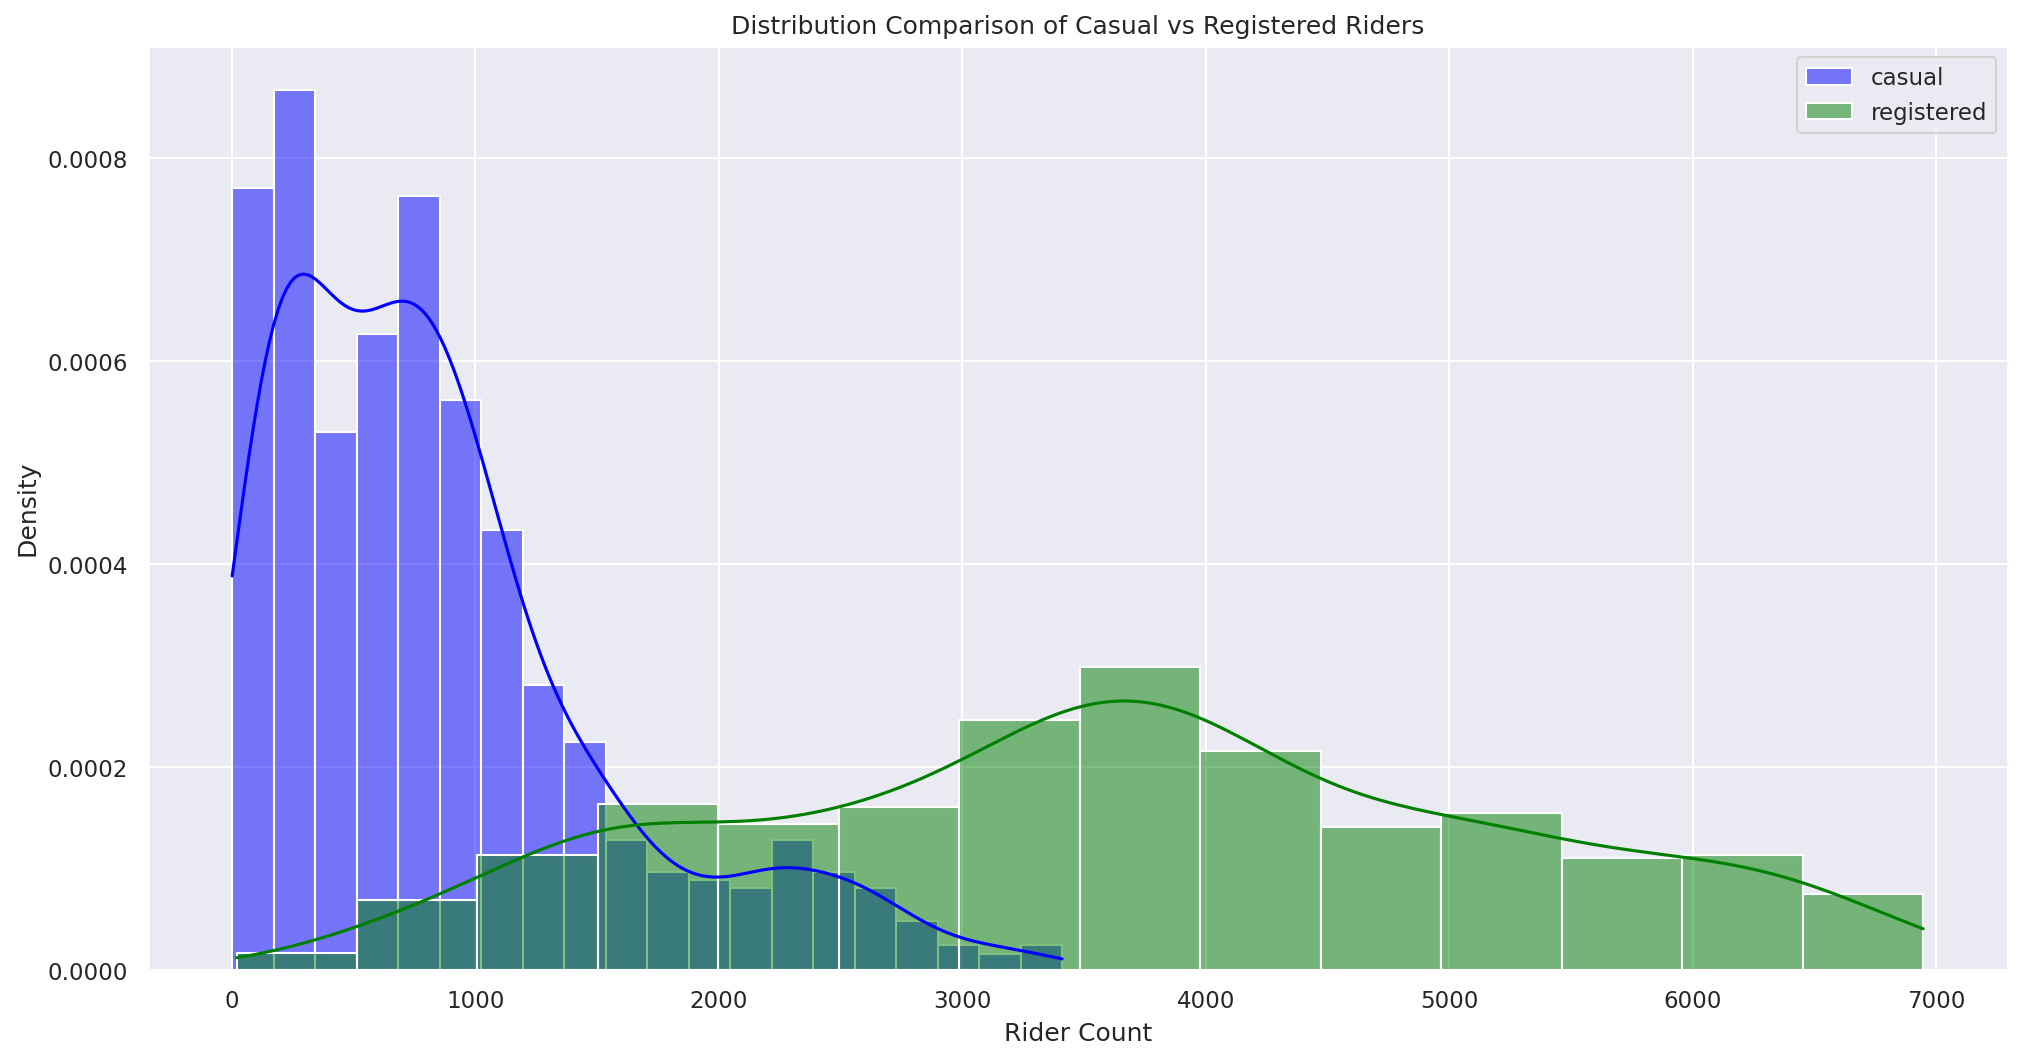

In [16]:
sns.histplot(data = daily_counts, x="casual", color = "blue", kde = True, stat = "density", label = "casual")
sns.histplot(data = daily_counts, x = "registered", color = "green", kde = True, stat = "density", label = "registered")
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Density")
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3b

In the cell below, describe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps, and outliers. Include a comment on the spread of the distributions. 

**Modes:**   Casual riders: The distribution appears to be unimodal with a peak around 500–1000 riders. The density curve rises quickly and then falls off after this peak.
Registered riders: This distribution is more spread out and bimodal, with a significant peak around 3000–3500 riders and a second smaller peak around 5000–5500 riders.

**Skewness:** Casual riders: The distribution is positively skewed (right-skewed), meaning most casual rider counts are concentrated toward lower values, with a long tail extending toward higher values.
Registered riders: The distribution is less skewed compared to casual riders, but it also leans slightly toward a positive skew, with fewer very high counts and a more even spread.

**Gaps:** Casual riders: There is no noticeable gap, but the density drops off sharply beyond 2000 riders.
Registered riders: There is a slight gap between the first and second mode, around 4000 riders, indicating a drop in density between these two peaks.

**Outliers:** Casual riders: The long tail suggests that there are some outliers (high rider counts) that deviate from the main cluster.
Registered riders: There are fewer noticeable outliers due to the wider spread and more even distribution, but the second mode around 5000–5500 could be considered a notable feature.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3c

The density plots do not show us how the counts for `registered` and `casual` riders vary together. Use `sns.lmplot` [(documentation)](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` `DataFrame` to plot hourly counts instead of daily counts.

The `lmplot` function will also try and draw a linear regression line (just as you saw in Data 8). Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 


<img src='images/casual_registered_working_nonworking.png' width="800px"  />

**Hints:** 
* Check out this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).
* There are many points in the scatter plot, so make them small to help reduce overplotting. Check out the `scatter_kws` parameter of `lmplot`.
* You can set the `height` parameter if you want to adjust the size of the `lmplot`.
* Add a descriptive title and axis labels for your plot.
* You should be using the `bike` `DataFrame` to create your plot.
* It is okay if the scales of your `x` and `y` axis (i.e., the numbers labeled on the two axes) are different from those used in the provided example.

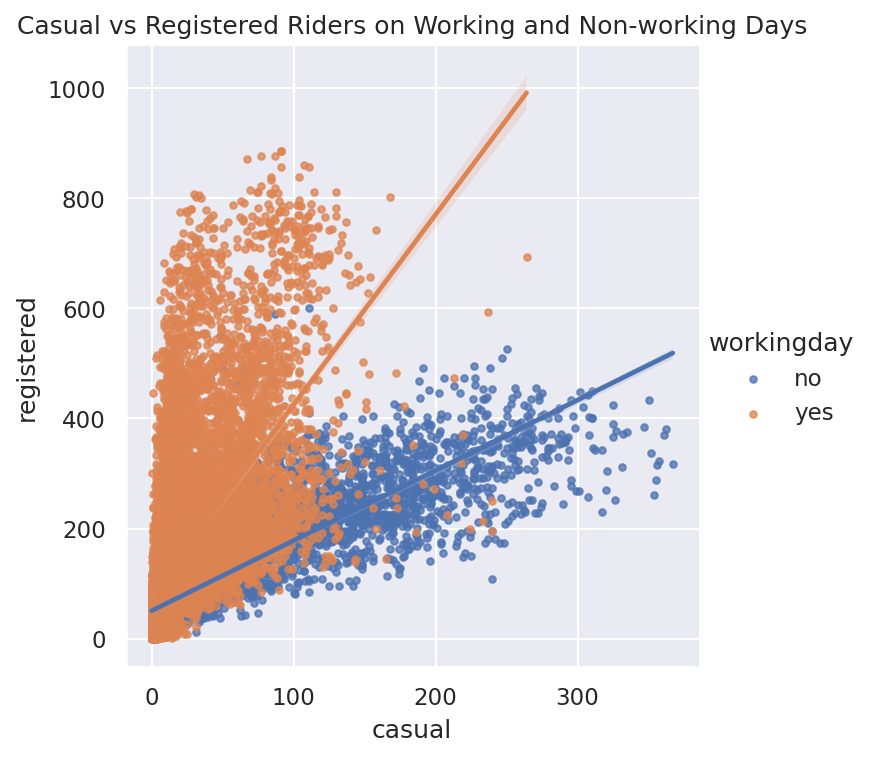

In [17]:
sns.set(font_scale=1) # This line automatically makes the font size a bit bigger on the plot. You do not need to change this line
sns.lmplot(data = bike, x = "casual", y = "registered", hue = "workingday", scatter_kws={"s": 10, "alpha": 0.75} )
plt.title("Casual vs Registered Riders on Working and Non-working Days")
plt.xlabel("casual")
plt.ylabel("registered")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does overplotting have on your ability to describe this relationship?

**Weekday vs. Weekend:** There appears to be a stronger positive correlation between casual and registered riders. As the number of casual riders increases, the number of registered riders also increases, but the slope of the relationship is steeper compared to non-working days. There is a distinct linear relationship, suggesting that on working days, higher casual usage is more likely associated with higher registered usage. However, on weekends The relationship is weaker and more scattered. While there is still some positive correlation, the points are more spread out, and the increase in registered riders is not as strongly tied to the number of casual riders.

**Overplotting:** The overplotting (points overlapping) makes it harder to fully observe the individual points, especially where the data is densely clustered, such as around lower casual and registered counts. 

**Description:** The overplotting slightly hinders the precision with which the relationship can be described, as many points appear to overlap, especially at the lower end of the scale. This makes it harder to assess the true spread of the data, and some potentially interesting trends might be hidden by the dense clustering.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 4: Visualization
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate. You will want to read up on the documentation for `sns.kdeplot`, which can be found [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types_simple.png' width="600px" />

A basic KDE plot of all the data is quite easy to generate. However, this plot combines both weekend and weekday data, which isn't what we want (see the example figure above).

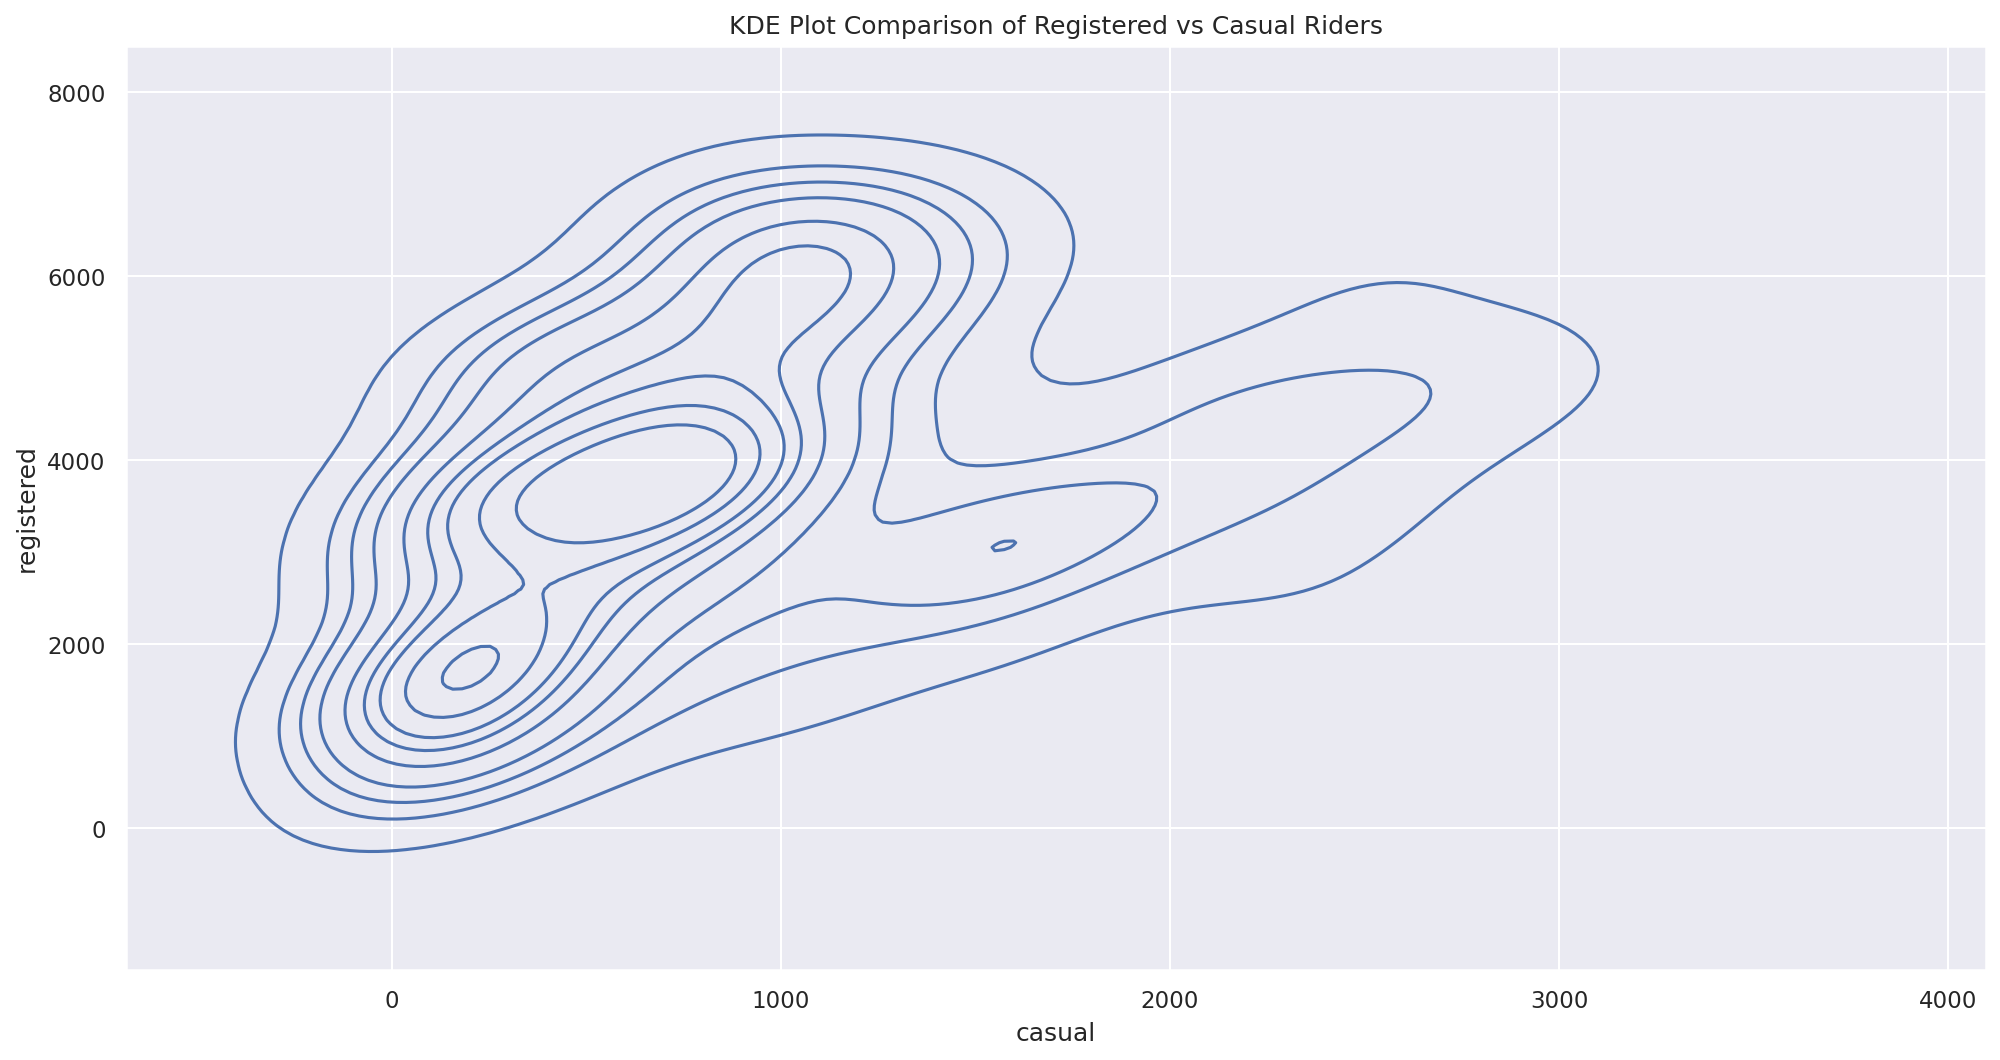

In [18]:
sns.kdeplot(data=daily_counts, x='casual', y='registered')
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

<!-- BEGIN QUESTION -->

<br>

--- 

### Question 4a (Bivariate Kernel Density Plot)

Generate a bivariate kernel density plot with workday and non-workday separated using the `daily_counts` `DataFrame`.

**Hints:** You only need to call `sns.kdeplot` once. Take a look at the `hue` parameter and adjust other inputs as needed.
 
After you get your plot working, experiment by setting `fill=True` in `kdeplot` to see the difference between the shaded and unshaded versions. Please submit your work with `fill=False`. 

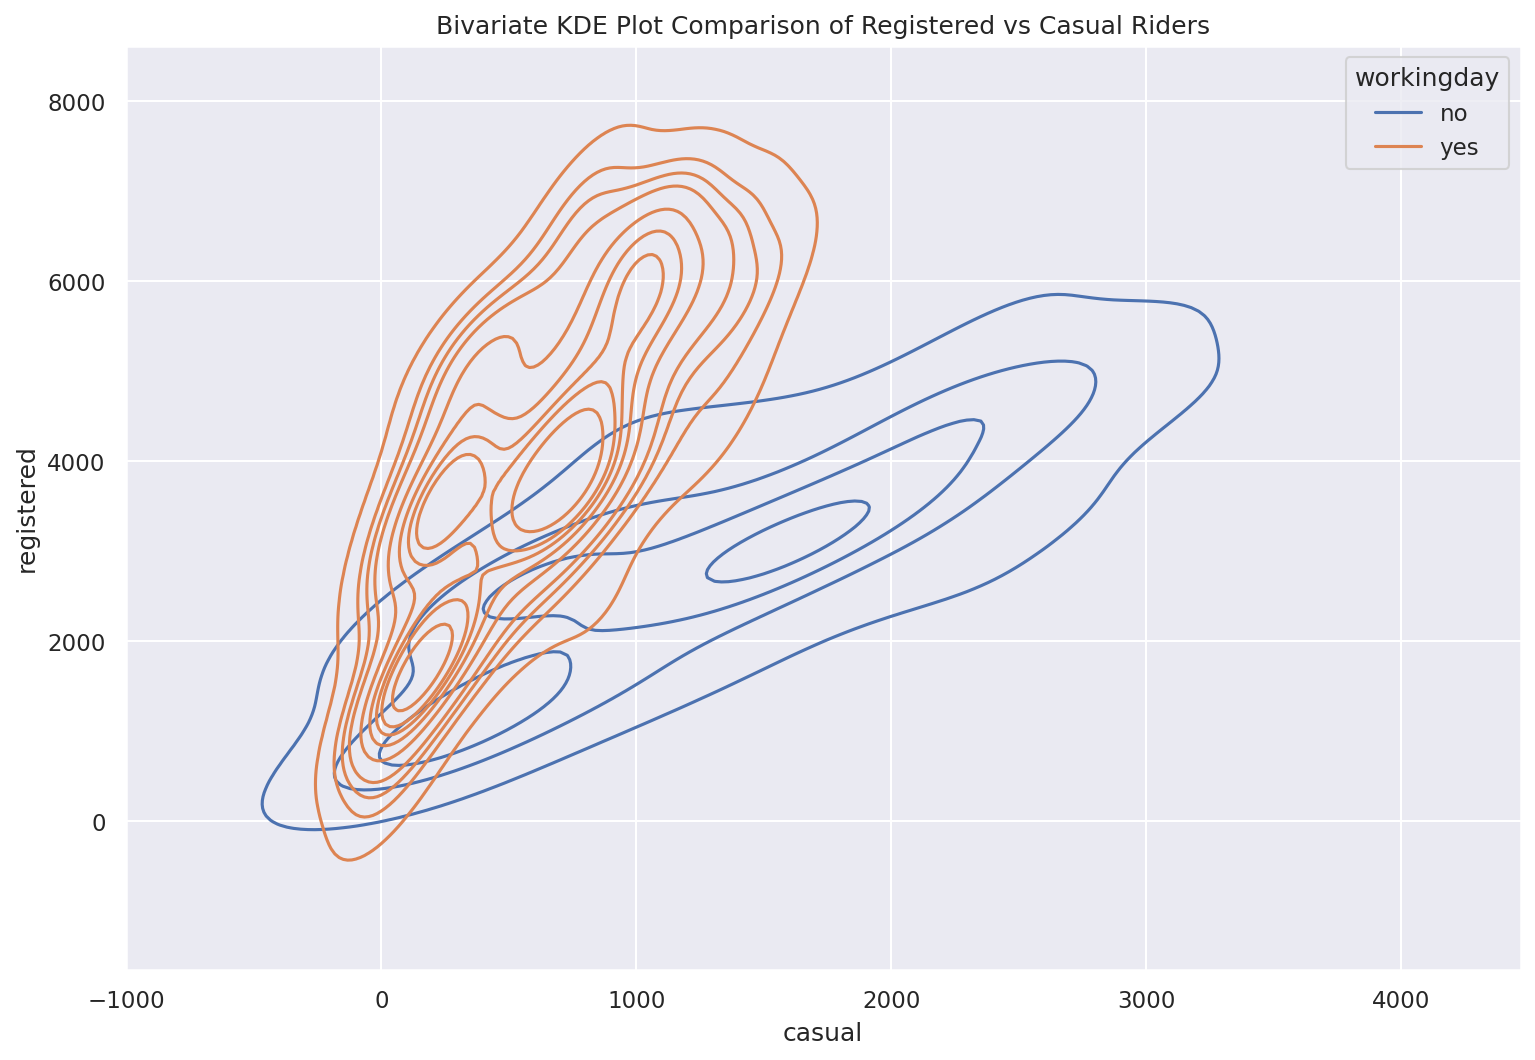

In [19]:
# Set the figure size for the plot
plt.figure(figsize=(12,8))

sns.kdeplot(data = daily_counts, x = "casual", y = "registered", fill = False, hue = "workingday")
plt.title("Bivariate KDE Plot Comparison of Registered vs Casual Riders")
plt.xlabel("casual")
plt.ylabel("registered")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 4b
<img src='images/bivariate_kde_of_daily_rider_types_gradient.png' width="800px" />

With some modification to your 4a code (this modification is not in scope), we can generate the plot above. In your own words, describe what the lines and the color shades of the lines signify about the data. What does each line and color represent? 

**Hint**: You may find it helpful to compare it to a contour or topographical map as shown [here](https://gisgeography.com/contour-lines-topographic-map/).

In this bivariate kernel density estimate (KDE) plot, each contour line represents areas of higher or lower density in the data, similar to the contours on a topographical map.

**Lines:** The lines in the KDE plot represent levels of density. Each line encloses an area where the density of data points (rider counts) is similar. The closer the lines are to each other, the higher the concentration of data points in that area.
**Color:** The color shading inside the contours indicates the density as well. Darker shades (e.g., dark blue or dark red) represent areas of higher density, meaning more data points (rider counts) fall within those regions. Lighter shades indicate lower density.

**Blue Contours:** Blue contours represent non-working days (e.g., weekends), where the density of casual riders is higher at lower registered rider counts (around 0 to 2000 registered riders).
**Red Contours:** where the density of both casual and registered riders is generally higher, but the contours are more concentrated around mid-level registered rider counts (2000–4000).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 4c

What additional details about the riders can you identify from this contour plot that were difficult to determine from the scatter plot?

**Concentration of Data Points:** In the scatter plot, it's hard to gauge how densely the data points are clustered in specific regions, especially where there's significant overplotting.The KDE plot, with its contour lines and shading, clearly shows the areas of higher concentration (represented by darker shades and closely packed lines), which are not immediately evident in the scatter plot.

**Clear Separation:**  The KDE plot makes it easier to compare the behavior of casual and registered riders between working and non-working days by providing smooth contours that represent density. 

**Density gradient:** The scatter plot doesn't provide a direct way to measure the concentration of points. The KDE plot, however, includes a gradient with a color bar that allows you to quantify the density of the data in various regions of the plot. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 5: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder to see the linear relationships between casual and registered for the two different conditions (weekday vs. weekend). You should be making use of `daily_counts`.

<img src="images/joint_distribution_of_daily_rider_types.png" width="600px" />

**Hints**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on a `seaborn` plot.
For example, if we wanted to plot a scatterplot with 'Height' on the x-axis and 'Weight' on the y-axis from some dataset `stats_df`, we could write the following:

`graph = sns.scatterplot(data=stats_df, x='Height', y='Weight')`

`graph.set_axis_labels("Height (cm)", "Weight (kg)")`


**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also called `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.

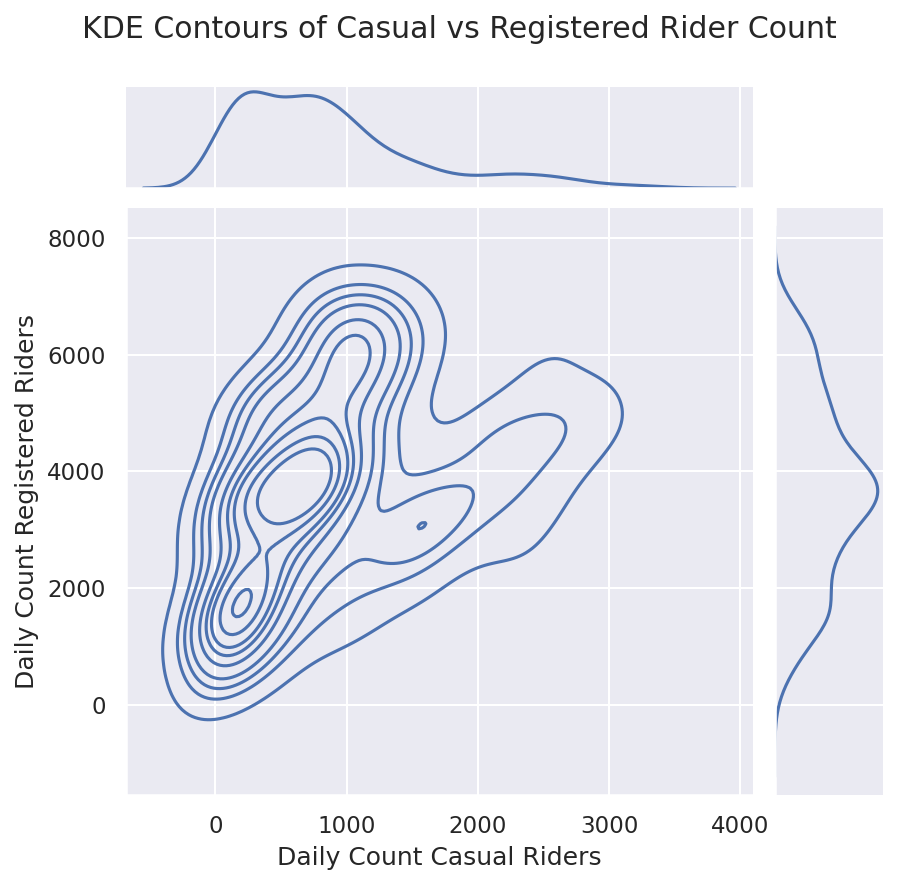

In [20]:
sns.jointplot(data= daily_counts, x= "casual", y= "registered", kind = "kde", fill = False)
plt.xlabel("Daily Count Casual Riders")
plt.ylabel("Daily Count Registered Riders")
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 6: Understanding Daily Patterns

<br>

--- 

### Question 6a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset** (that is, `bike` `DataFrame`), stratified by rider type.  

Your plot should look exactly like the plot below. It's fine if your plot's colors don't match ours exactly, but your plot should contain a legend and different colored lines for different kinds of riders, in addition to the title and axis labels.

**Note:** Your plot should not have any type of confidence interval shading. If it does, double check that you are computing the average number of riders for each hour of the day before plotting. [This part](https://ds100.org/debugging-guide/visualizations/visualizations.html#my-sns.lineplot-has-an-unwanted-shaded-region-around-the-solid-lines.) of the debugging guide may be helpful.

<img src="images/diurnal_bikes.png" width="800px"/>


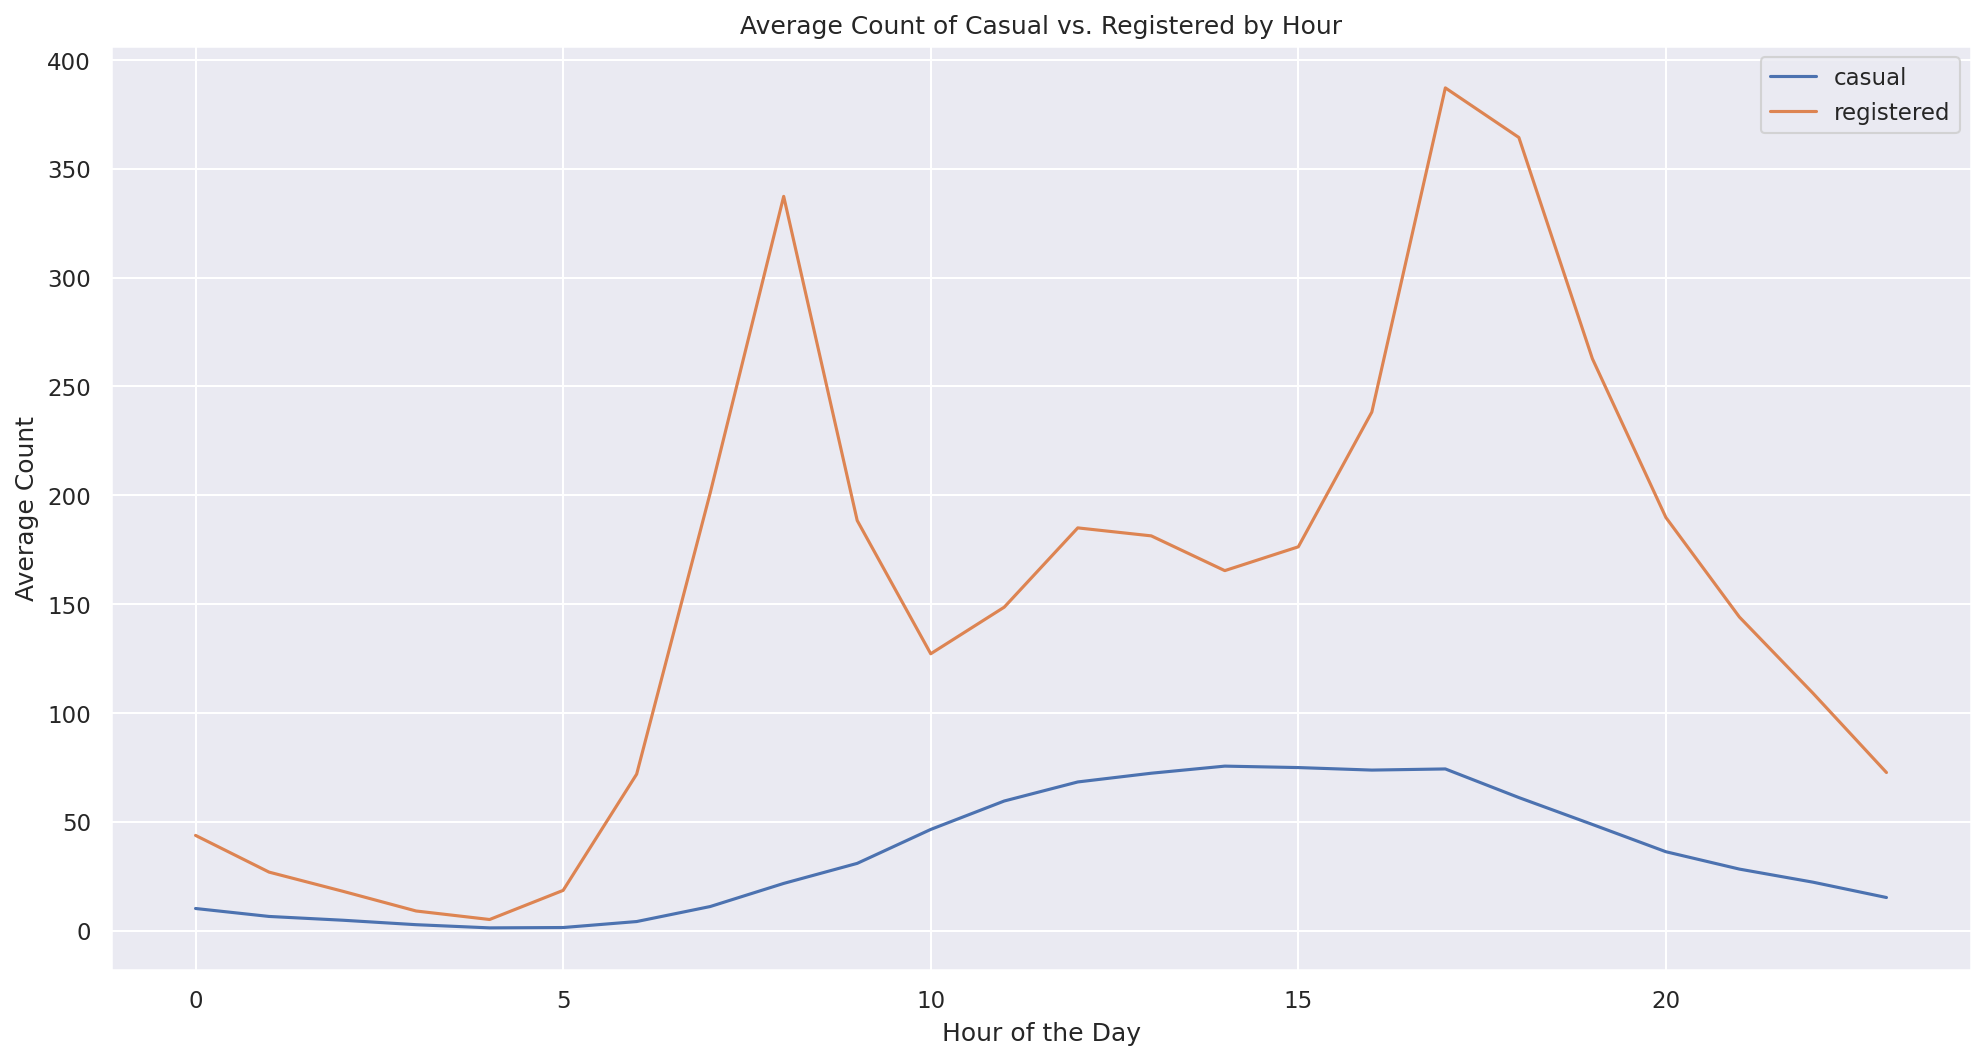

In [21]:
sns.lineplot(data = bike, x = "hr", y= bike.groupby("hr")["casual"].mean() , label = "casual")
sns.lineplot(data = bike, x = "hr", y= bike.groupby("hr")["registered"].mean() , label = "registered")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Count")
plt.title("Average Count of Casual vs. Registered by Hour")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 6b

What can you observe from the plot? Discuss your observations for both types of riders, and hypothesize about the meaning of the peaks in the registered riders' distribution.

**Observations:** This bimodal distribution reflects the working habits of registered users, with clear morning and evening commuting patterns. Casual riders, on the other hand, show a more gradual increase later in the day, likely reflecting leisure or recreational use.

**Casual Riders:** The average count of casual riders remains relatively low throughout the day, with a slight peak in the late afternoon (around 17:00 hours or 5 PM). This suggests that casual riders tend to use the bike-sharing system more toward the end of the day, likely after work or during leisure hours

**Registered Riders:** The distribution of registered riders shows two distinct peaks: one in the early morning (around 8:00 AM) and another in the late afternoon (around 17:00–18:00 hours). This pattern likely reflects commuting behavior, with registered riders using the bike-sharing service to travel to work in the morning and back home in the evening.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 7: Exploring Ride-Sharing and Weather
Now let's examine how the weather is affecting riders' behavior. First, let's look at how the proportion of casual riders changes as the weather changes.

<br>

--- 

### Question 7a
Create a new column `prop_casual` in the `bike` `DataFrame` representing the proportion of casual riders out of all riders for each record.

In [22]:
bike["prop_casual"] = bike["casual"] / bike["cnt"]

In [23]:
grader.check("q7a")

q7a results: All test cases passed!


In order to examine the relationship between the proportion of casual riders and temperature, we can create a scatterplot using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). We can even use color/hue to encode the information about the day of the week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

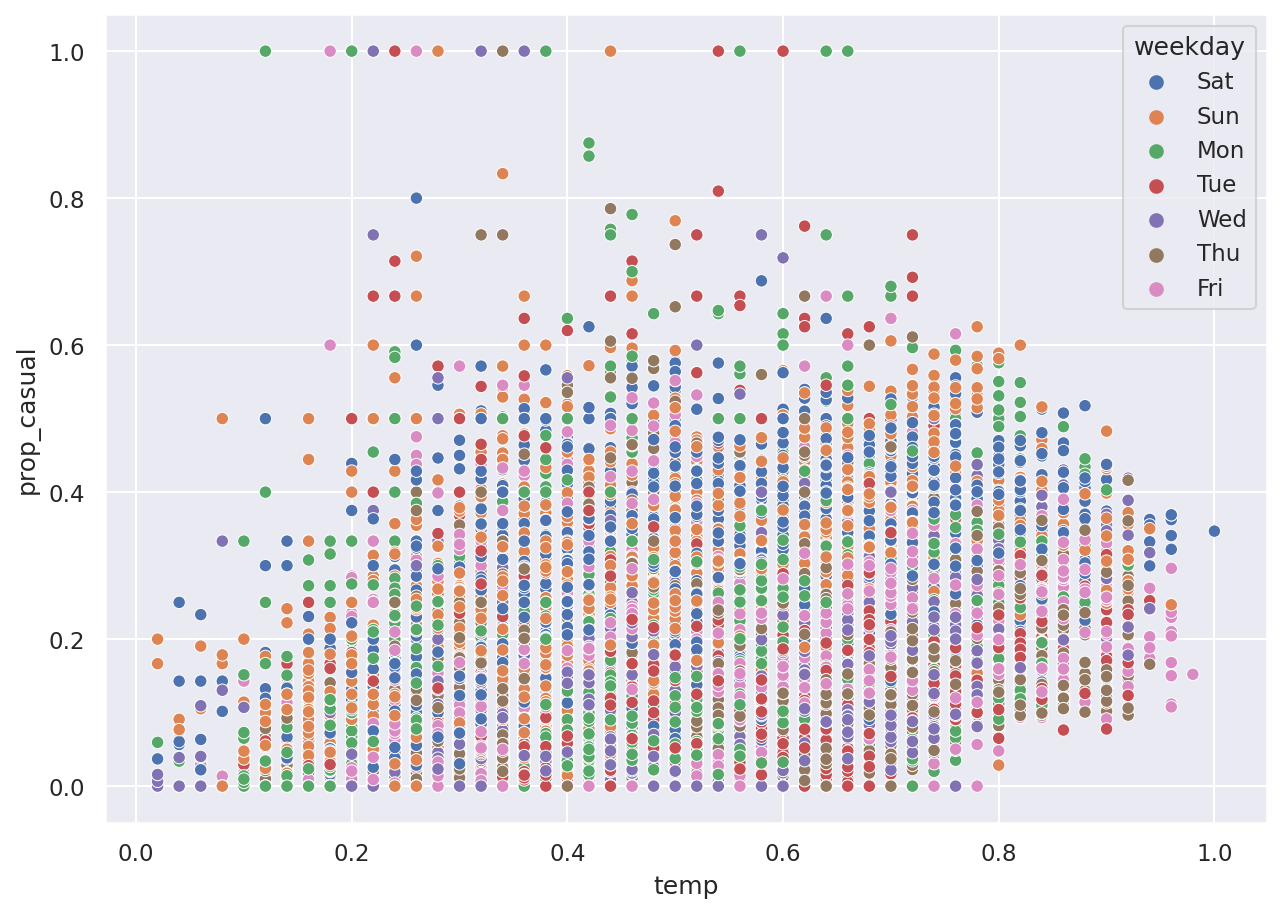

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x='temp', y='prop_casual', hue='weekday');

We could attempt linear regression using `sns.lmplot` as shown below, which hints at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

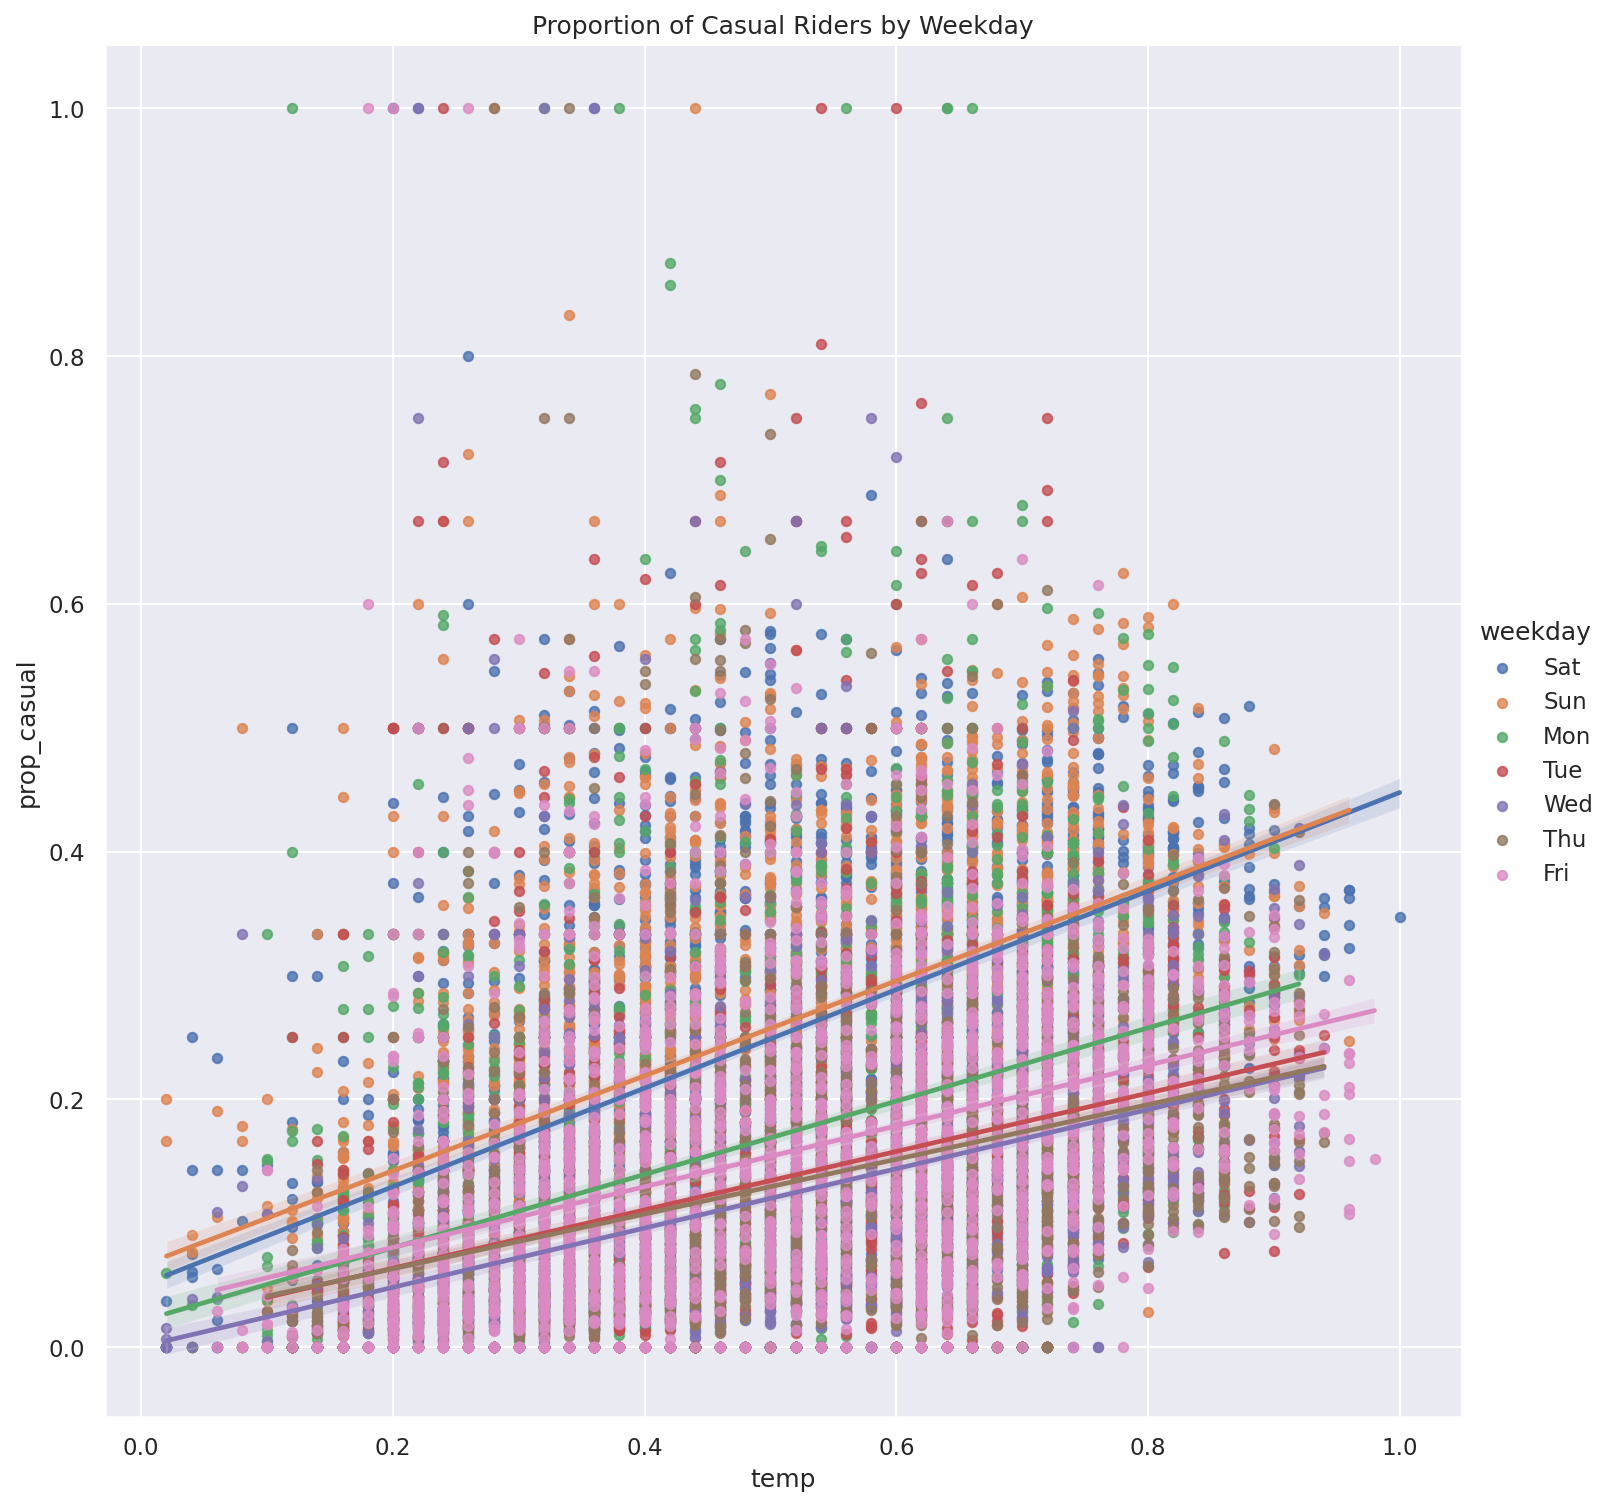

In [25]:
sns.lmplot(data=bike, x='temp', y='prop_casual', hue='weekday', scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each `x` value, we compute some sort of representative `y` value that captures the data close to that `x` value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. We have shown an example below. The red curve shown is a smoothed version of the scatterplot.

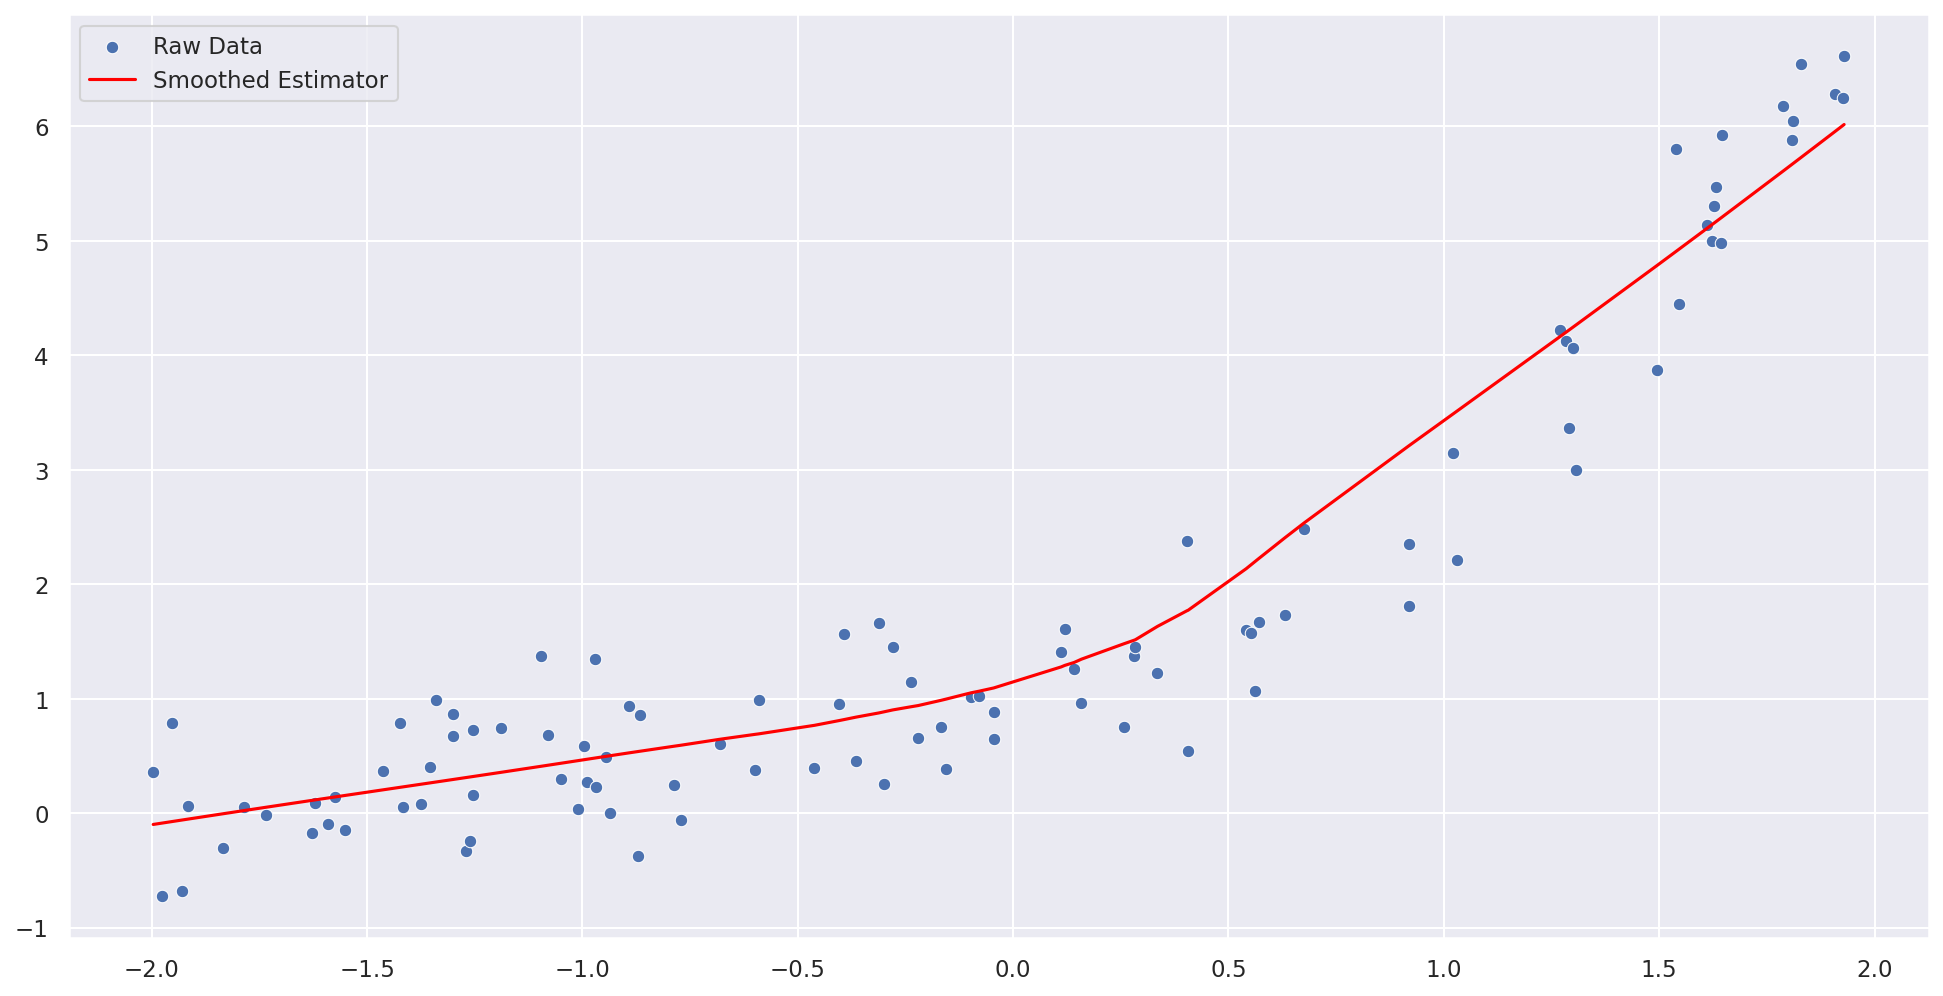

In [26]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
x_obs = np.sort(np.random.rand(100)*4.0 - 2)
y_obs = np.exp(x_obs) + np.random.randn(100) / 2.0

# Plot a regular scatterplot with our noisy data 
sns.scatterplot(x=x_obs, y=y_obs, label="Raw Data")

# Pass in the noisy data to lowess to generate the smoothed y-values, 
# we want to preserve the relative ordering of the y-values, which is why return_sorted=False
y_smooth = lowess(y_obs, x_obs, return_sorted=False)

# Plot a red line using the smoothed y-values
sns.lineplot(x=x_obs, y=y_smooth, label="Smoothed Estimator", color='red')
plt.legend();

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 7b

In our case, with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature (as given in the `'temp'` column), and the y-axis will be a smoothed version of the proportion of casual riders. 

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by plotting only one day of the week to make sure you can do that first. Then, consider using a `for` loop to repeat this plotting operation for all days of the week.

* The `lowess` function expects the `y` coordinate first, then the `x` coordinate. You should also set the `return_sorted` field to `False`.

* **You will need to rescale the normalized temperatures stored in this dataset to Fahrenheit values.** Look at the section of this notebook titled 'Loading Bike Sharing Data' for a description of the (normalized) temperature field to know how to convert back to Celsius first. After doing so, convert it to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} \times \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well! Just remember to convert accordingly so the graph is still interpretable.

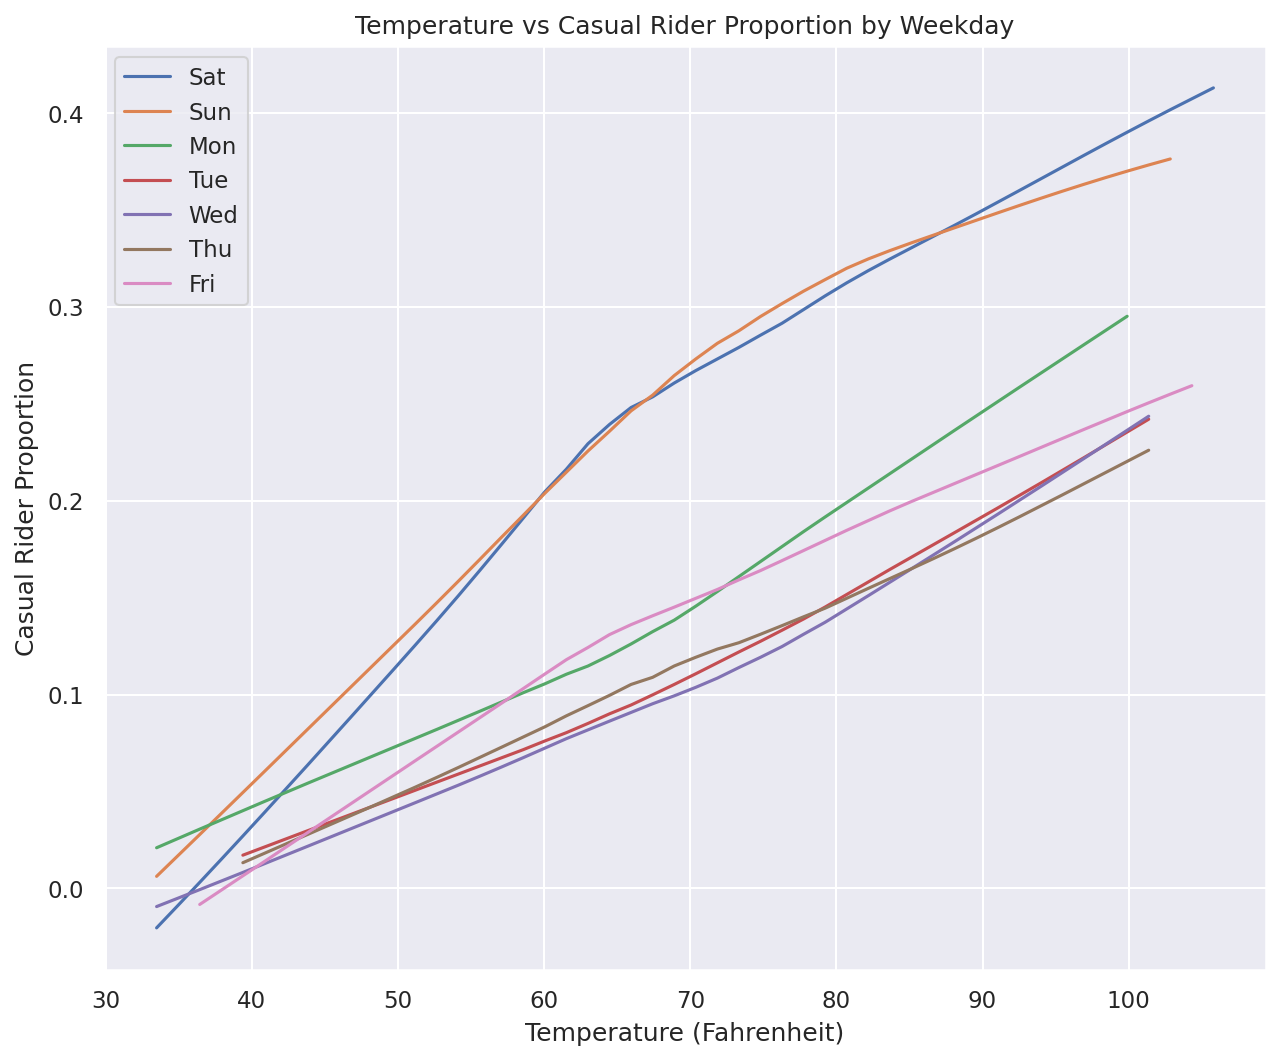

In [27]:
from statsmodels.nonparametric.smoothers_lowess import lowess

weekdays = ["Sat", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", ]

plt.figure(figsize=(10,8))

for day in weekdays:
    day_data = bike[bike["weekday"] == day]
    day_data["temp fahrenheit"] = day_data["temp"] * 41 * (9/5) + 32
    day_data = day_data.sort_values(by="temp fahrenheit")
    y_smooth = lowess(day_data["prop_casual"], day_data["temp fahrenheit"], return_sorted = False)
    plt.plot(day_data["temp fahrenheit"], y_smooth, label = day)

plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 7c
What do you observe in the above plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

**Temperature:** As temperature increases, the proportion of casual riders increases for all days of the week. This is evident from the upward slopes of all the lines, indicating that warmer temperatures encourage more casual ridership.
**Weekday vs. Weekends:** There is a clear distinction between weekdays and weekends. Saturday and Sunday show significantly higher proportions of casual riders compared to weekdays at all temperature levels. Monday to Friday have consistently lower casual rider proportions, indicating that casual riders are more likely to use the service during weekends.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## 8: Expanding our Analysis

<!-- BEGIN QUESTION -->

<br>

--- 

### Question 8a

Imagine you are working for a bike-sharing company that collaborates with city planners, transportation agencies, and policymakers in order to implement bike-sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike-sharing program is implemented equitably. In this sense, equity is a social value that informs the deployment and assessment of your bike-sharing technology. 

Equity in transportation includes: Improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford transportation services and assessing how inclusive transportation systems are over time. 

Do you think the `bike` data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.

**Note**: There is no single "right" answer to this question – we are looking for thoughtful reflection and commentary on whether or not this dataset, in its current form, encodes information about equity.


**No**, the current dataset doesn't provide enough information to assess equity, particularly because it lacks data on demographics, socio-economic factors, and location.

**Pricing:** Introducing data on the cost of renting a bike and how that varies across different neighborhoods or time periods would give insight into how pricing affects usage. Pricing could be used to assess whether the service is affordable for lower-income users. It could also be studied alongside location data to determine whether areas with lower socio-economic status are priced fairly compared to wealthier areas.

**Trip Duration and Distance:** By analyzing how long and how far users ride bikes, you could assess whether bike-sharing meets transportation needs for daily commuting, or if it's more often used for leisure in wealthier areas. A focus on trip duration and distance could reveal whether bike-sharing is a viable and practical option for people in different socio-economic groups who rely on public transportation.

**Location:**  Location data could help assess whether bike-sharing infrastructure is equitably distributed across different neighborhoods, especially across varying socio-economic statuses.  By analyzing the geographic spread of bike-sharing stations, we can identify if lower-income neighborhoods have access to the system or if they are underrepresented. Spatial clustering could help measure accessibility in underserved areas. 

<!-- END QUESTION -->



In [28]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 8b
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us), and new cities and regions are making efforts to implement bike-sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike-sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities in the US. 

Based on your plots in this assignment, would you recommend expanding bike sharing to additional cities in the US? If so, what cities (or types of cities) would you suggest? Please list at least two reasons why, and mention which plot(s) you drew your analysis from. 

**Note**: There isn't a set right or wrong answer for this question. Feel free to come up with your own conclusions based on evidence from your plots! 


**Climate Considerations:** Given that bike-sharing is more successful in cities with warmer climates, expansion should target cities that do not experience harsh winters or frequent snowfall. Cities such as Miami, Memphis, Nashville, and Los Angeles, where winter conditions are mild or nonexistent, would allow for year-round use, maximizing the return on investment. 

**Predictable Usage Patterns:** Based on the Casual vs. Registered Riders on Working and Non-working Days plot, we can see that bike usage tends to follow predictable patterns, with registered riders using bikes more frequently for commuting during the workweek and casual riders utilizing them more on weekends and in good weather. This predictability would make it easier for bike-sharing systems to optimize bike availability and distribution, tailoring the service to meet demand more effectively.


**Environmental Benefits:** Bike-sharing systems have the potential to reduce the number of cars on the road, leading to lower carbon emissions. This would contribute positively to efforts to combat climate change by promoting a more sustainable form of transportation. Cities that prioritize green initiatives, such as Los Angeles or Austin, could especially benefit from the environmental impact of a bike-sharing system.

<!-- END QUESTION -->



In [ ]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 4!
# Jiayin Lin's guinea pig, Pig, says "great job!"
<img src = "images/pig.jpg" width = "200">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://docs.google.com/forms/d/e/1FAIpQLSdpKA_E3b7PGqKSRqBUgSebb9bVFhRwRBv1ueisGsnKFkZkYg/viewform?usp=sf_link). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 4 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 4 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your **plots/graphs and written responses** were generated and submitted correctly to the HW 4 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 4 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [29]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q2a results: All test cases passed!

    q2b results: All test cases passed!

    q2c results: All test cases passed!

    q7a results: All test cases passed!
